<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [3]:
import pandas as pd
df = pd.read_csv('summary.csv')
df

,DATE,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO,FREG,INTEN
0,198001,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147,0,0.0
1,198002,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094,0,0.0
2,198003,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553,0,0.0
3,198004,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231,0,0.0
4,198005,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,202008,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514,2,67.5
488,202009,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357,2,90.0
489,202010,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270,0,0.0
490,202011,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811,0,0.0


In [4]:
df.columns

Index(['DATE', 'AAO', 'AMO', 'AO', 'EMI', 'GMT', 'NINO3', 'NINO4', 'PDO',
       'PNA', 'QBO', 'FREG', 'INTEN'],
      dtype='object')

In [16]:
X = df.drop(columns = ['DATE','FREG','INTEN']) # "X"라는 변수에 날짜, 횟수와 강도를 제외하고 지정
y = df['FREG']
y2 = df['INTEN']
print('Info: ')
print(df.info())

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    492 non-null    int64  
 1   AAO     492 non-null    float64
 2   AMO     492 non-null    float64
 3   AO      492 non-null    float64
 4   EMI     492 non-null    float64
 5   GMT     492 non-null    float64
 6   NINO3   492 non-null    float64
 7   NINO4   492 non-null    float64
 8   PDO     492 non-null    float64
 9   PNA     492 non-null    float64
 10  QBO     492 non-null    float64
 11  FREG    492 non-null    int64  
 12  INTEN   492 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 50.1 KB
None


Have to remove highly correlated features bigger than 0.95, but nothing here.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Input

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((344, 10), (344,), (148, 10), (148,))

In [17]:
i = Input(shape=(None, 455, 10))

x = Dense(16, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

y = Dense(1, activation='sigmoid')(x)

model_adam = Model(inputs=i, outputs=y)

In [18]:
model_adam.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_adam.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 455, 10)]   0         
                                                                 
 dense_7 (Dense)             (None, None, 455, 32)     352       
                                                                 
 dropout_6 (Dropout)         (None, None, 455, 32)     0         
                                                                 
 dense_8 (Dense)             (None, None, 455, 64)     2112      
                                                                 
 dropout_7 (Dropout)         (None, None, 455, 64)     0         
                                                                 
 dense_9 (Dense)             (None, None, 455, 32)     2080      
                                                                 
 dropout_8 (Dropout)         (None, None, 455, 32)     0   

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

history_adam = model_adam.fit(x=X_train, y=y_train,
                             validation_data=(X_test, y_test),
                             epochs=300,
                             callbacks=[early_stopping])

Epoch 1/300


 1/11 [=>............................] - ETA: 9s - loss: 2140.6558 - accuracy: 0.3125

11/11 [==============================] - 1s 54ms/step - loss: 1217.6337 - accuracy: 0.4506 - val_loss: 42.6343 - val_accuracy: 0.6351
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 643.6973 - accuracy: 0.5233 - val_loss: 47.9807 - val_accuracy: 0.8311
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 604.6851 - accuracy: 0.5698 - val_loss: 47.5450 - val_accuracy: 0.8311
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 498.4846 - accuracy: 0.6221 - val_loss: 45.0414 - val_accuracy: 0.8311
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 300.4659 - accuracy: 0.6279 - val_loss: 39.6070 - val_accuracy: 0.8311
Epoch 6/300
11/11 [==============================] - 0s 6ms/step - loss: 341.8093 - accuracy: 0.6221 - val_loss: 33.4732 - val_accuracy: 0.8311
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 288.2363 - accuracy: 0.6686 - val_loss: 27.5829 - val_accuracy: 0.8311
Ep

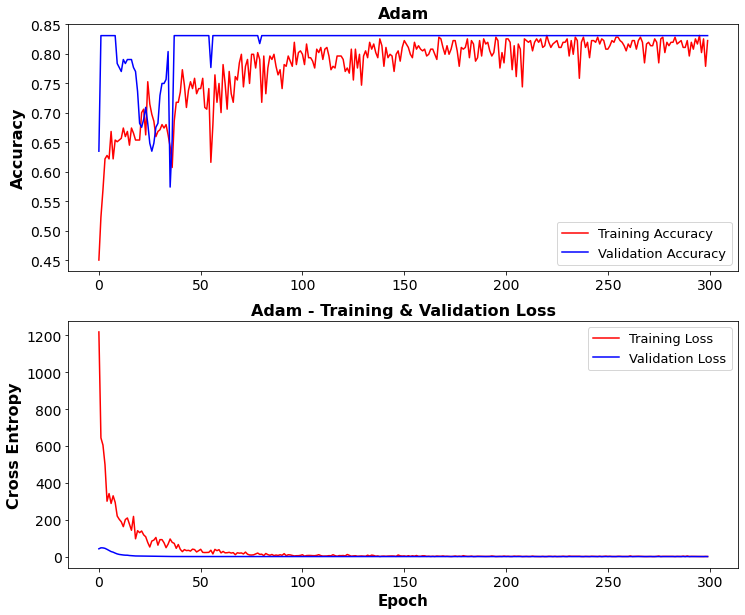

In [20]:
acc = history_adam.history['accuracy']
val_acc = history_adam.history['val_accuracy']

loss = history_adam.history['loss']
val_loss = history_adam.history['val_loss']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Adam', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Adam - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [21]:
from sklearn.metrics import classification_report

Y_pred = model_adam.predict(X_test)
y_pred = np.round(Y_pred).astype(int)

print(classification_report(y_test, y_pred))

5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       123
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        10

    accuracy                           0.83       148
   macro avg       0.28      0.33      0.30       148
weighted avg       0.69      0.83      0.75       148



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
model_rmsprop = Model(inputs=i, outputs=y)

model_rmsprop.compile(optimizer='rmsprop', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(x=X_train, y=y_train,
                             validation_data=(X_test, y_test),
                             epochs=500,
                             callbacks=[early_stopping])

Epoch 1/500


 1/11 [=>............................] - ETA: 14s - loss: 0.6266 - accuracy: 0.7812

11/11 [==============================] - 2s 36ms/step - loss: 1.0807 - accuracy: 0.7733 - val_loss: 0.5487 - val_accuracy: 0.8311
Epoch 2/500
11/11 [==============================] - 0s 9ms/step - loss: 2.3330 - accuracy: 0.8081 - val_loss: 0.5487 - val_accuracy: 0.8311
Epoch 3/500
11/11 [==============================] - 0s 10ms/step - loss: 0.9026 - accuracy: 0.8169 - val_loss: 0.5487 - val_accuracy: 0.8311
Epoch 4/500
11/11 [==============================] - 0s 9ms/step - loss: 0.6040 - accuracy: 0.8256 - val_loss: 0.5487 - val_accuracy: 0.8311
Epoch 5/500
11/11 [==============================] - 0s 8ms/step - loss: 0.8715 - accuracy: 0.8169 - val_loss: 0.5486 - val_accuracy: 0.8311
Epoch 6/500
11/11 [==============================] - 0s 17ms/step - loss: 1.2219 - accuracy: 0.8140 - val_loss: 0.5486 - val_accuracy: 0.8311
Epoch 7/500
11/11 [==============================] - 0s 18ms/step - loss: 0.7725 - accuracy: 0.8081 - val_loss: 0.5485 - val_accuracy: 0.8311
Epoch 8/500
11/11 [==

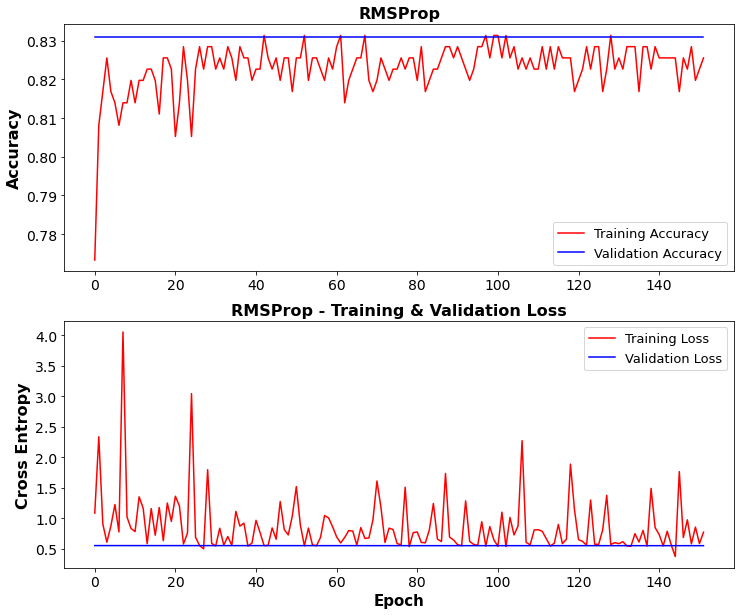

In [23]:
acc = history_rmsprop.history['accuracy']
val_acc = history_rmsprop.history['val_accuracy']

loss = history_rmsprop.history['loss']
val_loss = history_rmsprop.history['val_loss']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('RMSProp', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('RMSProp - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [25]:
from sklearn.metrics import classification_report

Y_pred_r = model_rmsprop.predict(X_test)
y_pred_r = np.round(Y_pred_r).astype(int)

print(classification_report(y_test, y_pred_r))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       123
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        10

    accuracy                           0.83       148
   macro avg       0.28      0.33      0.30       148
weighted avg       0.69      0.83      0.75       148



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Conclution

Adam: 91% Accurcay

RMSProp: 91% Accurcay